In [1]:
import numpy as np
import sys
sys.path.insert(0,'..')
from pygwb.statistical_checks import StatisticalChecks
from pygwb_pipe.statistical_checks_pipe import run_statistical_checks_from_file
%matplotlib inline

# Statistical checks: a first introduction

**Disclaimer**

- The output of statistical checks is dependent on changes in other modules (e.g. delta sigma cut). Therefore, the emphasis of the current status of notebook should be that this notebook is a tool to give an idea of what the statistical checks do/how to use it, rather than on the actual numerical values (as these are still subject to change due to modification in other parts of the code).
- Some datasets shown below might not have been run with the most up-to-date pipeline.

**Goal**

In this tutorial, an overview of the statistical checks module of pyGWB is provided. More specifically, we will cover the initializiation of the class, as well as the various outputs of the class methods. We will consider two concrete test cases:
1) On a stretch of O3 data
2) On a simulated power-law injection (from the MDC)

Both should illustrate the main features of the statistical check plots.

## Initialization of statistical checks module

The initialization of the statistical checks module requires the following input:
- **GPS times**
- **Sliding point estimates**
- **Sliding sigmas**
- **Naive sigmas**
- **Point estimate spectrum**: frequency dependent spectrum of the point estimate (combined over the whole run).
- **Sigma spectrum**: frequency dependent spectrum of the sigmas (combined over the whole run).
- **Frequencies**: frequencies associated to above frequency spectra.
- **Bad GPS times**: times identified as "bad" by the delta sigma cut.
- **Delta sigma values**: values of the delta sigma used to identify and cut bad times.
- Directory where the plots will be saved
- Name of the baseline
- Path to parameter file with parameters used during the analysis run

## Overview of the methods

Below we give an overview of the methods in the statistical checks module. We distinguish two categories: 
1) A set of methods that computes quantities that will be used later on in the module
2) A set of methods that plots the various quantities

### 1. Methods computing quantities

From the input passed to initialize the statistical checks class, various quantities are derived/computed. An overview of these method is given below with a short explanation.

**get_data_after_dsc**

- Uses the attributes of the class set during the init (sliding point estimate, sliding sigma, etc.) and applies a mask to cut out the values that correspond to bad GPS times as identified by the delta sigma cut
- Output are arrays of all quantities with masked applied to original arrays

**compute_running_quantities**:

- Uses as input the sliding point estimate and sliding sigma values that were set during init
- Computes the running point estimate and running sigma as a function of time
- Will be used by plotting method to make plots of these running quantities as shown below (running point estimate as an example)

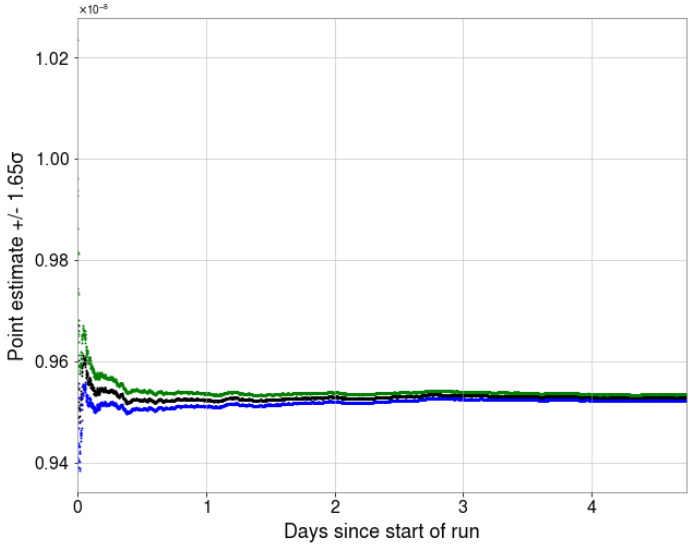

**compute_ifft_integrand**: 

- Given the point estimate spectrum (which can be related to the so-called point estimate integrand), one can construct the inverse Fourier transform of this quantity
- Used in a plot (as shown below), where a peak at 0 would indicate a detection (more details will be given in the next section).

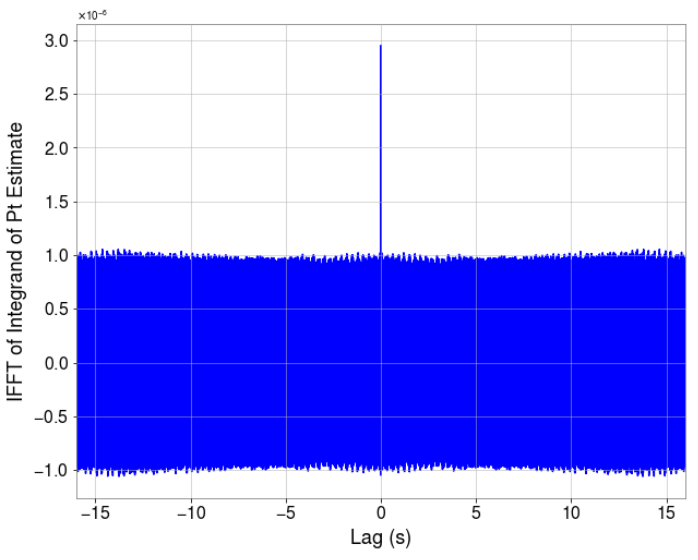

This concludes the part on methods that compute specific quantities. We now give an overview of the methods used for plotting.

### 2. Methods for plotting

Below we give an overview of all the plotting methods. All these plotting methods and their functionalities will be illustrated later on in a few concrete test cases below.
- plot_running_point_estimate 
- plot_running_sigma
- plot_IFFT_point_estimate_integrand
- plot_SNR_spectrum
- plot_cumulative_SNR_spectrum
- plot_real_SNR_spectrum
- plot_imag_SNR_spectrum
- plot_sigma_spectrum
- plot_cumulative_sigma_spectrum
- plot_omega_sigma_in_time
- plot_hist_sigma_dsc
- plot_scatter_sigma_dsc
- plot_scatter_omega_sigma_dsc
- plot_hist_omega_pre_post_dsc
- plot_KS_test
- plot_hist_sigma_squared
- plot_omega_time_fit

The user could decide to call them one by one or to call all of them by using the `generate_all_plots()` method, as will be illustrated below.

We now proceed to illustrate the functionalities of the statistical checks class by considering two examples. Both examples were run on the output of the pygwb_pipeline. As mentioned previously, we are still working on a code/pipeline for the statistical checks to read in results from pygwb_pipe and optimization thereof. The two examples below rely on the current version of this statistical checks pipeline (not included in this tutorial for now). The key point is that that code reads in from files and combines all quantities into arrays that can then be passed to the statistical checks to initialize the class.

## Example 1: O3 data

As a first concrete example, we consider a stretch of O3 data, on which pygwb_pipe was run and subsequently, the statistical checks. As mentioned above, we rely on the current version of a statistical checks pipeline that reads in from files (called `run_statistical_checks_from_file`). Both for this example and the next one, only part of the files are read in for the sake of time (until this is optimized). The method used for reading in the files requires the following input:
- A directory where the output of the pygwb_pipe is saved
- A path to the combined spectra are saved
- The path to the parameter file used for the analysis
- A directory where the plots of statistical checks will be saved

In [2]:
param_file = "./tutorial_data/parameters_final.ini"
baseline_directory = "./tutorial_data/"
combine_file = "./tutorial_data/"
plot_dir = './'

Given the above paths, the `run_statistical_checks_from_file` method will read all necessary quantities from the files in those directories and initialize an instance of the `StatisticalChecks` class:

In [3]:
stat_checks_pygwb_O3=run_statistical_checks_from_file(baseline_directory, combine_file, plot_dir, param_file)

Done sliding
Done reading naive
Done naive sigma computation


As mentioned above, one can decide to run the plotting methods separately or call the `generate_all_plots` method. We choose the latter for this example:

**Plotting**

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


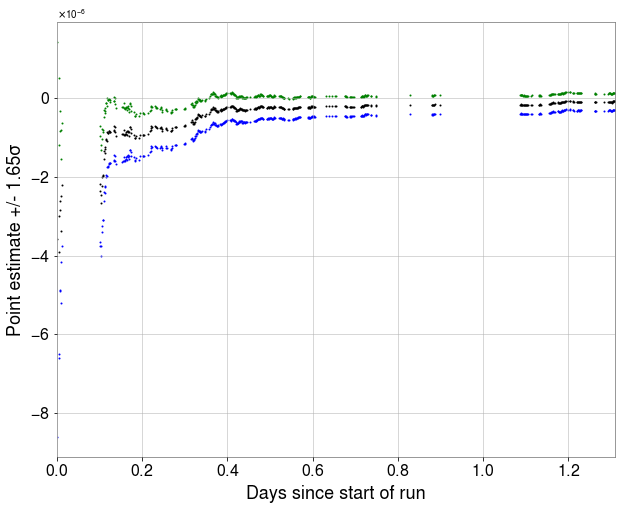

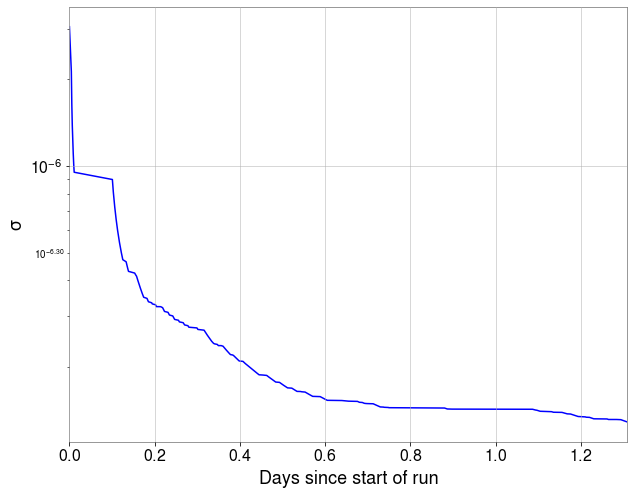

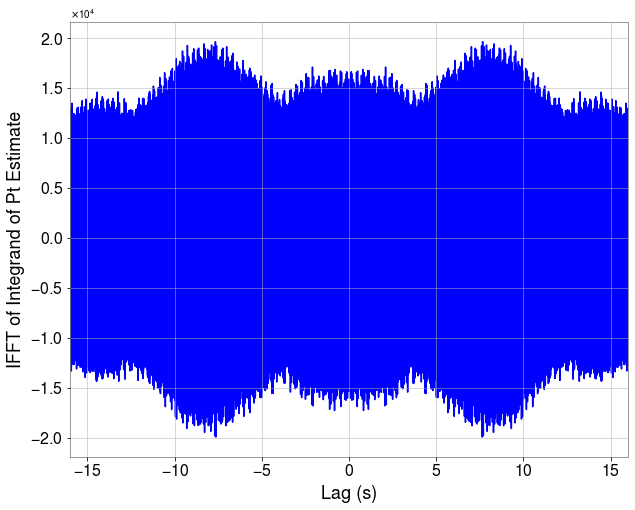

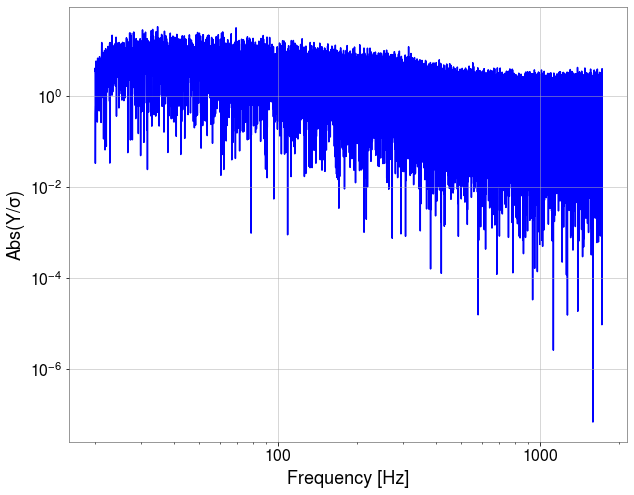

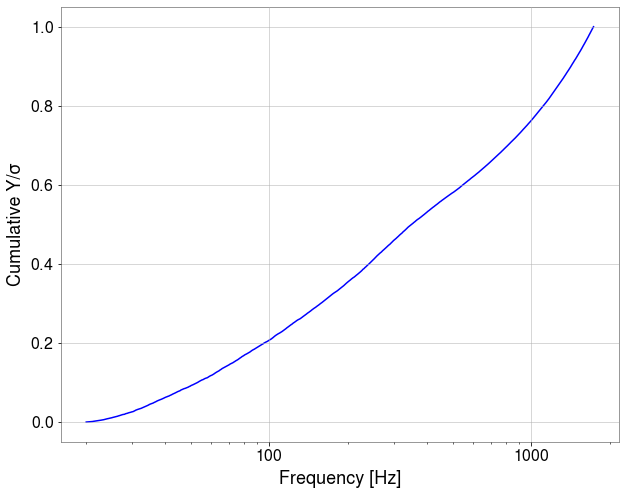

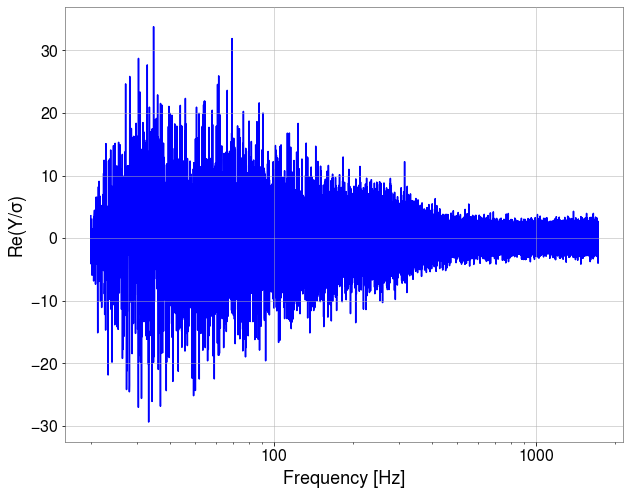

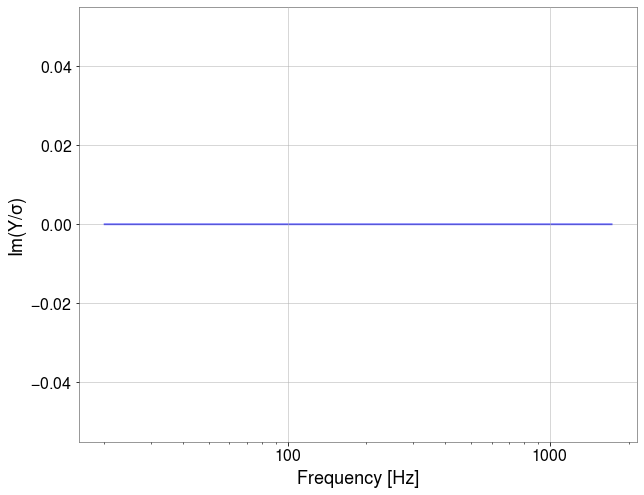

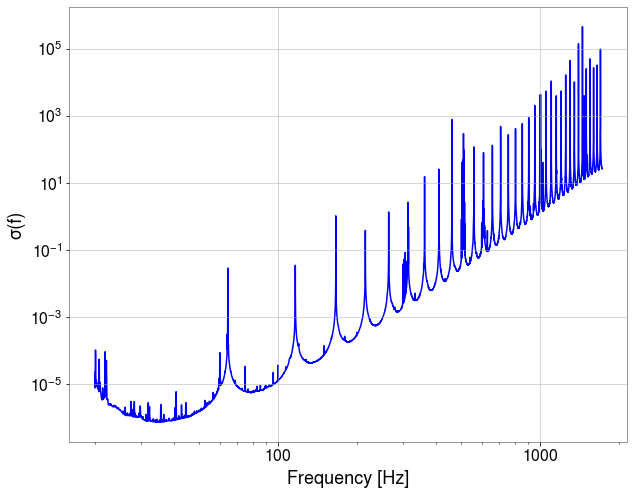

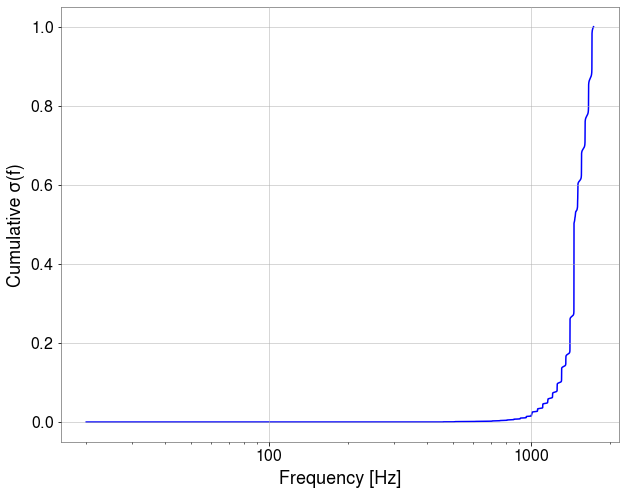

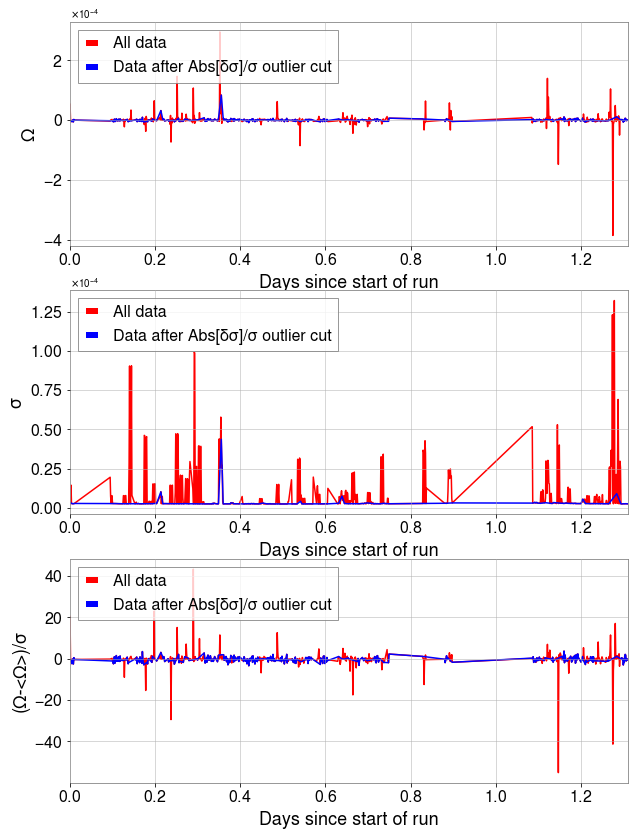

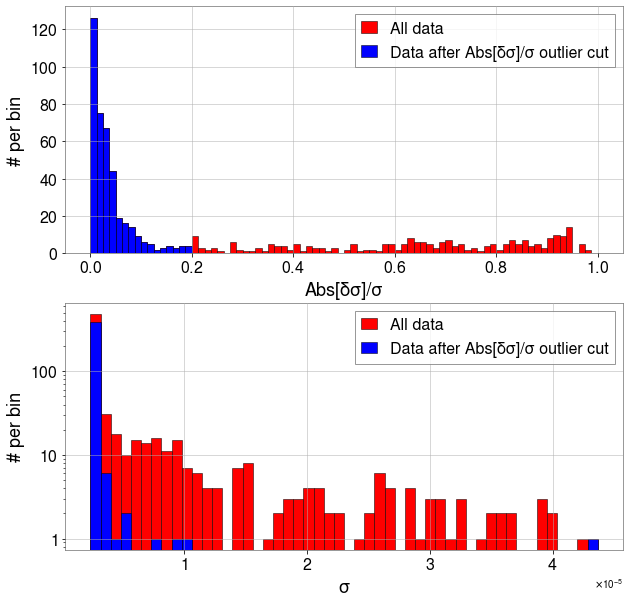

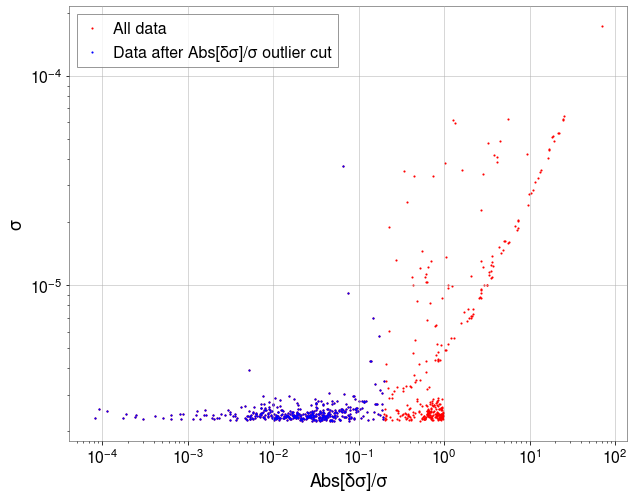

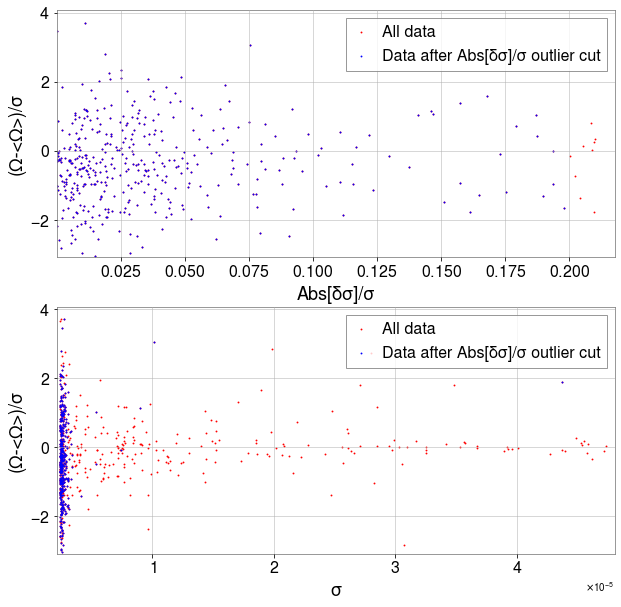

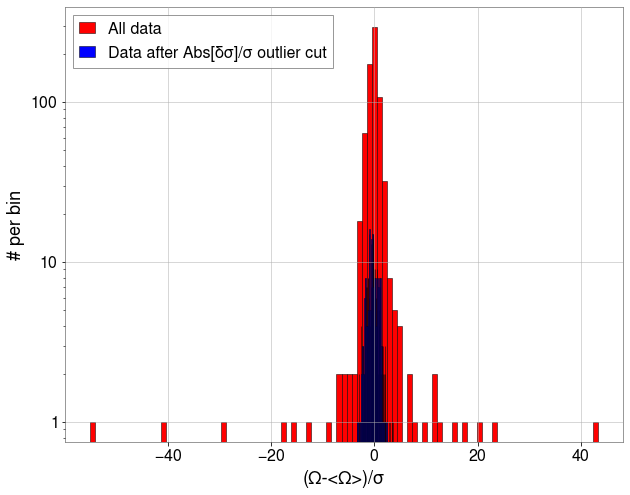

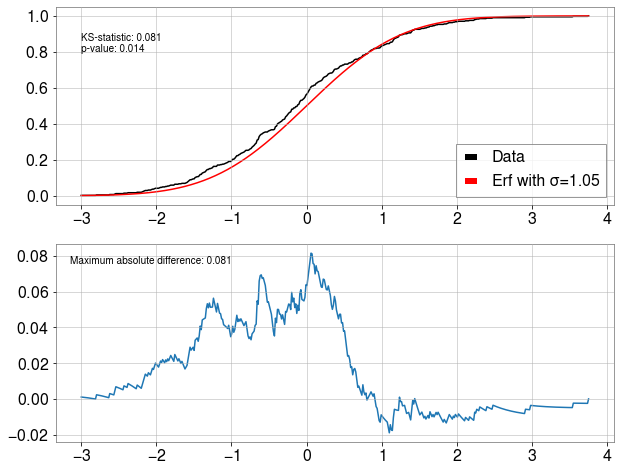

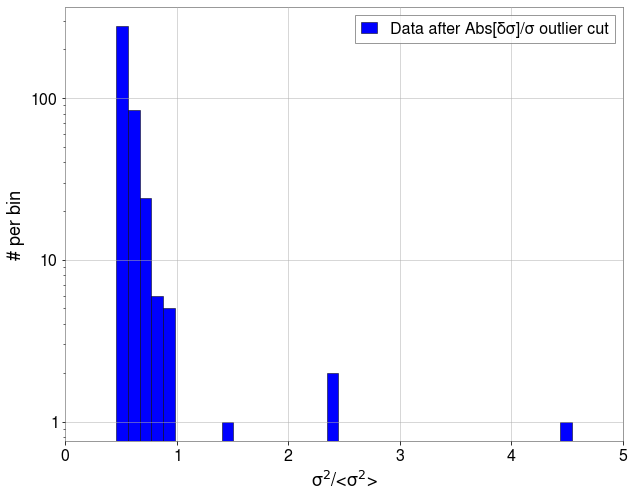

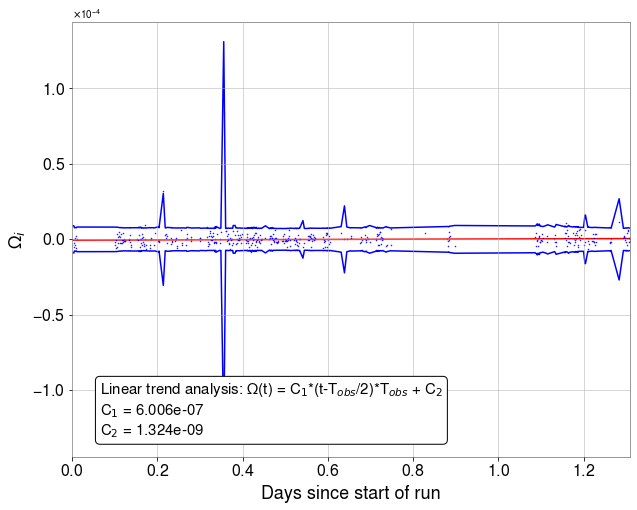

In [4]:
stat_checks_pygwb_O3.generate_all_plots()

We delay the plot per plot discussion of the statistical checks in this example to the next example below.

## Example 2: injected power-law signal, no noise (from MDC)

We now proceed with a second example, using data from the MDC: an injected power-law signal without noise (Omega_ref = .95e-8 at fref=25 Hz). We again rely on the current version of a script to read in the pygwb_pipe output and initialize the statistical checks class (where again, for the sake of time, only part of the files are read in).

**NOTE**

For this dataset, no bad GPS times were applied. Therefore, the comparison pre/post delta sigma cut cannot be made. Furthermore, the pygwb code was modified after running on this dataset, such that the Y(f) spectrum now has both an real and imaginary component (in this example only the real component was present).

In [5]:
param_file = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/parameters_gating_final.ini"
baseline_directory = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/output/"
combine_file = "/home/max.lalleman/public_html/Code/New_Clone_pyGWB/pygwb/pygwb_pipe/DAG/Gating_pyGWB_Recovery_First_Test/combined_output/point_estimate_sigma_spectra_alpha_0.7_fref_25_0-15790080.npz"
plot_dir = '/home/kevin.turbang/public_html/Stochastic_lite/statistical-checks-new/tutorials/plots_new/'

In [6]:
stat_checks_pygwb_MDC=run_statistical_checks_from_file(baseline_directory, combine_file, plot_dir, param_file)

Done sliding
Done reading naive
Done naive sigma computation


**Plotting**

Contrarily to the first example, we will now go over each of the plots separately and provide some explanation as to why this is a useful test.

We start with the running point estimate. In the case of a detection, over time, this should evolve towards the point estimate value of the detected gravitational wave background. Note that in this case, since we injected a signal, the running point estimate evolves towards that injected value.

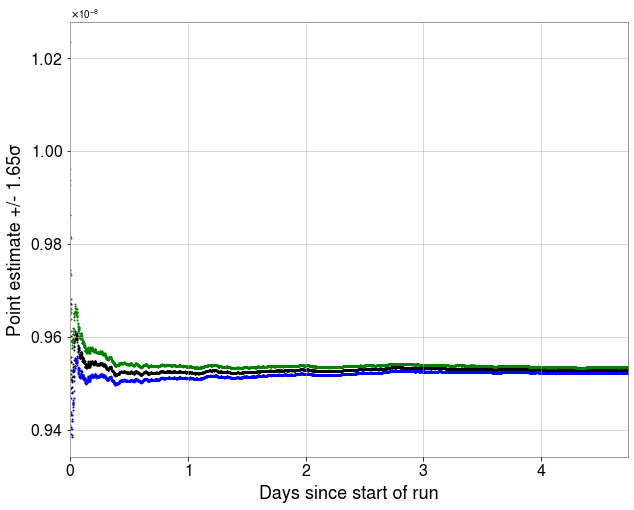

In [7]:
stat_checks_pygwb_MDC.plot_running_point_estimate()

Similarly to the running point estimate, one can plot the running sigma value. The running sigma should decrease with time, as a longer observation time reduces the uncertainty.

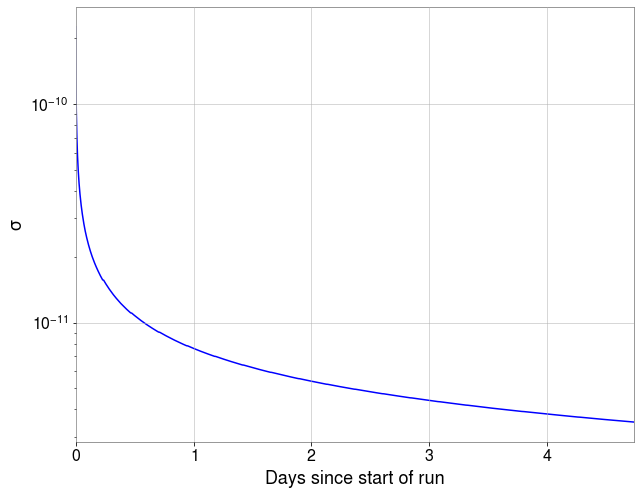

In [8]:
stat_checks_pygwb_MDC.plot_running_sigma()

The next plot shows the inverse Fourier transform of the point estimate integrand (which can be related to the point estimate spectrum Y(f) that was provided as input to the class). In the case of a detection, this plot should have a peak around 0, as is the case for this example. In the opposite case, no peak is present.

/cvmfs/oasis.opensciencegrid.org/ligo/sw/conda/envs/igwn-py38/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


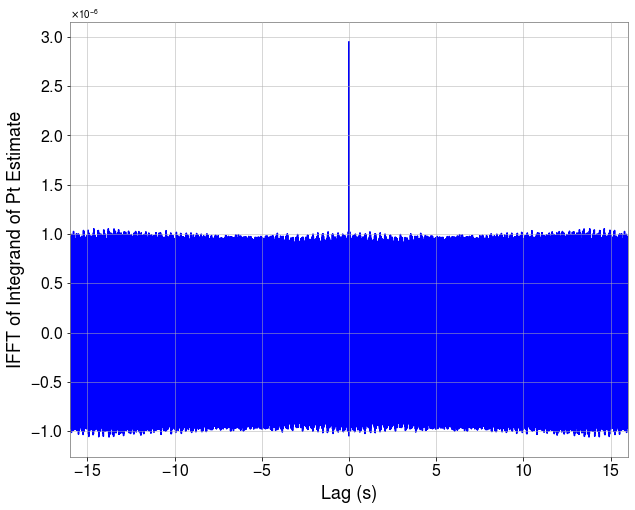

In [9]:
stat_checks_pygwb_MDC.plot_IFFT_point_estimate_integrand()

The few plots below depicting Y/sigma (SNR) and sigma will be explained here as they should be used together to make various statements. For those who are familiar with the statistical checks in stochastic.m, one will notice that these plots are slightly different. Stochastic.m shows the point estimate integrand and sensitivity integrand, whereas here we show the sigma spectrum and the SNR spectrum, i.e. Y(f)/sigma(f). A few things to note:

- The point estimate spectrum Y(f) is a complex variable. The real part contains information about the signal, whereas the imaginary part contains information about the noise.
- We decide to show sigma(f) to give an idea of how noisy each frequency bin is.
- Combining this sigma spectrum with a plot of the SNR, given by Y(f)/sigma(f), provides us with information on how sensitive we are in a given bin.

For the above quantities we show the absolute value, real and imaginary part, as well as some cumulative value plots.

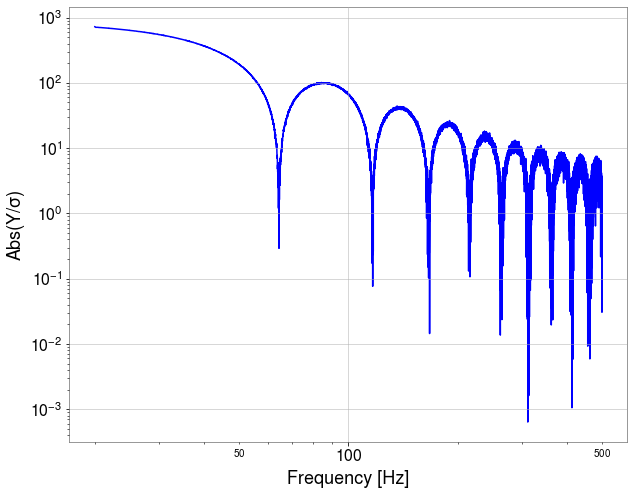

In [10]:
stat_checks_pygwb_MDC.plot_SNR_spectrum()

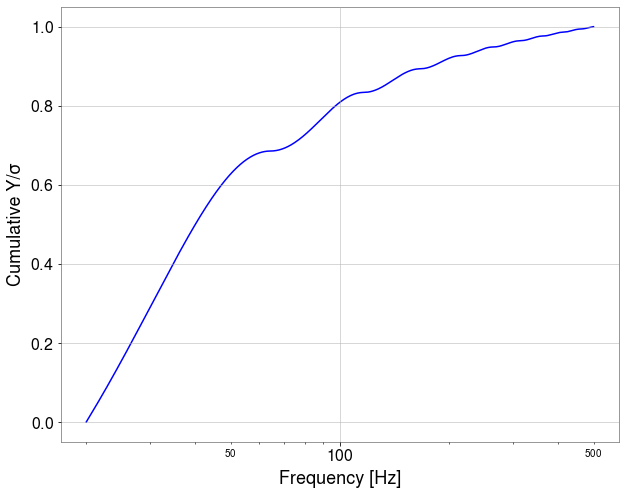

In [11]:
stat_checks_pygwb_MDC.plot_cumulative_SNR_spectrum()

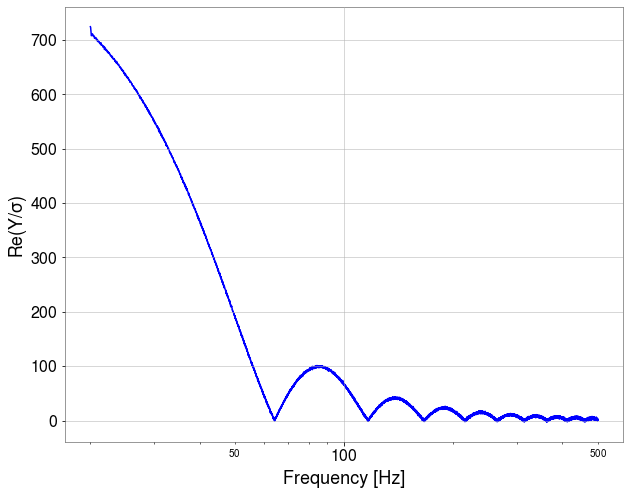

In [22]:
stat_checks_pygwb_MDC.plot_real_SNR_spectrum()

Note: the plot below should not be zero. This is accounted for in a more recent version of the pygwb code, but this dataset was run prior to that change.

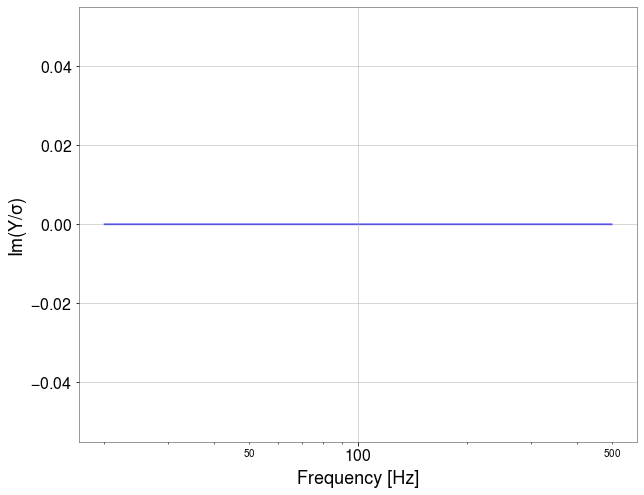

In [23]:
stat_checks_pygwb_MDC.plot_imag_SNR_spectrum()

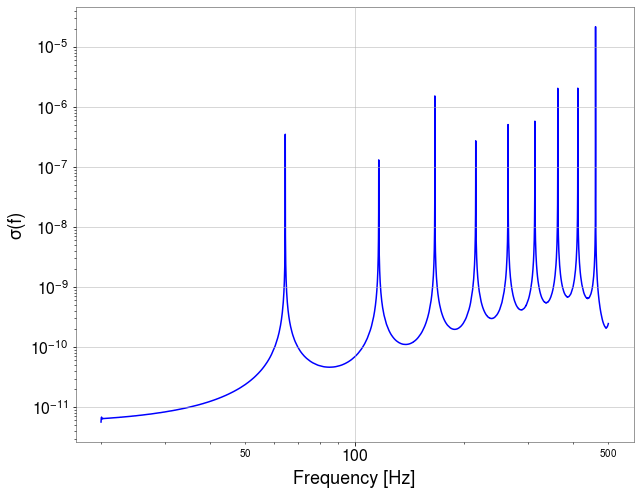

In [24]:
stat_checks_pygwb_MDC.plot_sigma_spectrum()

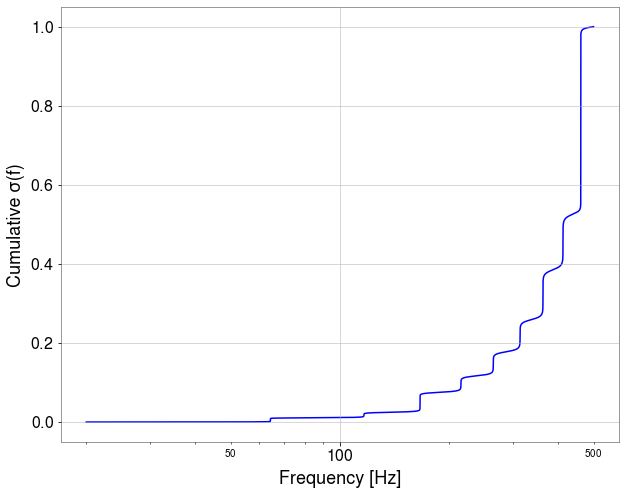

In [25]:
stat_checks_pygwb_MDC.plot_cumulative_sigma_spectrum()

We now illustrate various quantities (the point estimate Omega, sigma and the deviations) as a function of time. In principle, one should be able to see two datasets (before and after cut), but as mentioned earlier, no cuts were applied for this dataset. Note that the point estimate Omega oscilates around the injected value of .95e-8.

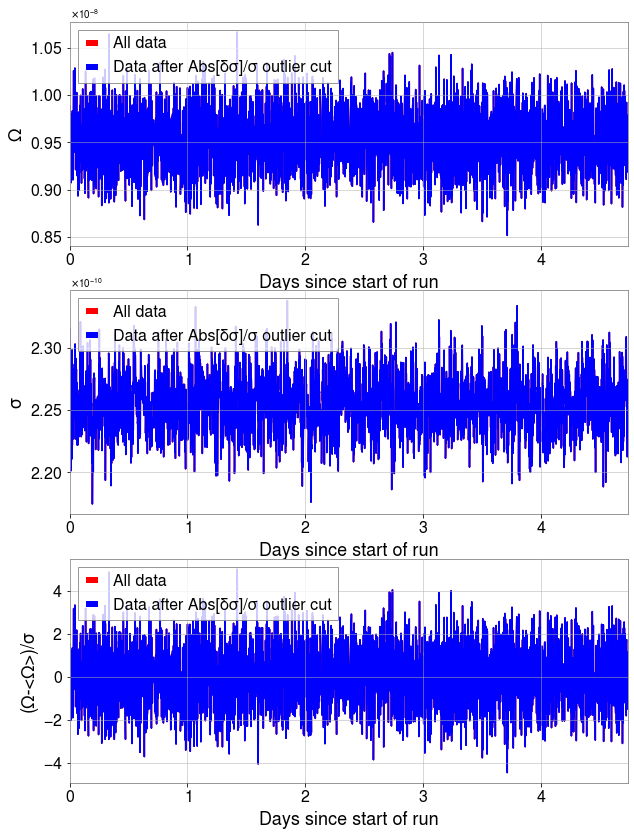

In [26]:
stat_checks_pygwb_MDC.plot_omega_sigma_in_time()

The plot below illustrates the distribution of the delta sigma values as well as the sigma values. When applying a delta sigma cut, there should be a clear difference between the two in these plots, as all delta sigma values above some value would be cut out.

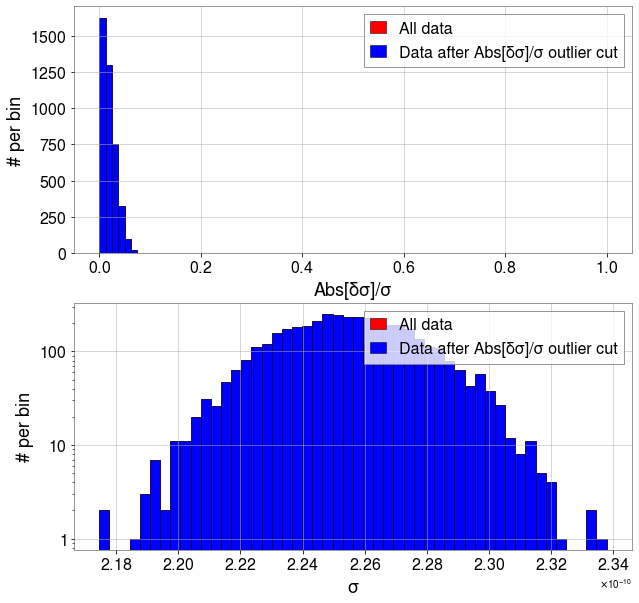

In [27]:
stat_checks_pygwb_MDC.plot_hist_sigma_dsc()

A scatter plot showing the distribution of the delta sigma values compared to the naive sigmas.

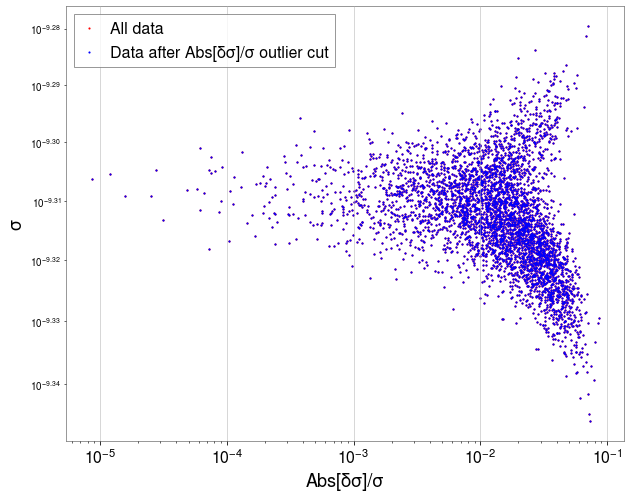

In [28]:
stat_checks_pygwb_MDC.plot_scatter_sigma_dsc()

The deviation from the mean point estimate value as a function of both the delta sigma values and the sigma values.

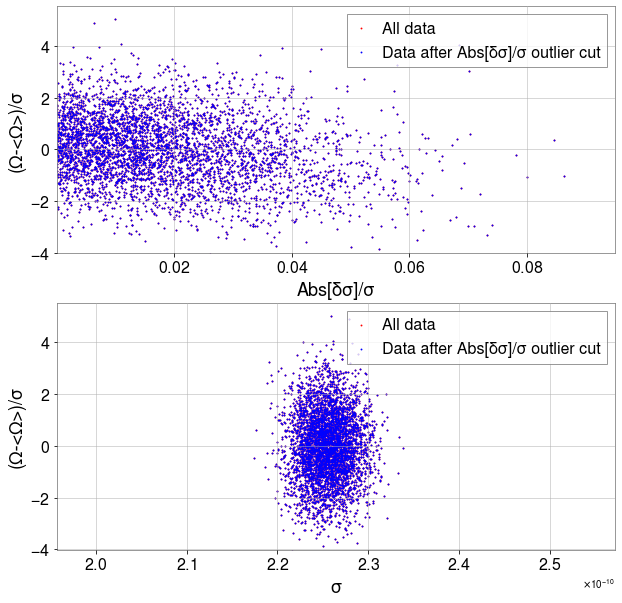

In [4]:
stat_checks_pygwb_MDC.plot_scatter_omega_sigma_dsc()

The histogram below depicts the distribution of the deviations from the point estimate mean in units of sigma. This shoulyd be centered around 0.

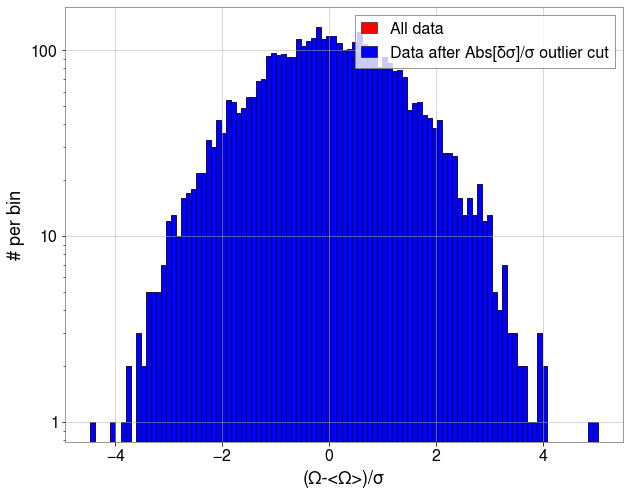

In [30]:
stat_checks_pygwb_MDC.plot_hist_omega_pre_post_dsc()

A KS test is performed to assess whether the data is Gaussian (which is what we assume in our search). The larger the p-value, the better the agreement with the normal distribution. The top plot shows the cumulative distribution of the data compared to the CDF of a normal distribution. The bottom plot shows the difference between these two curves.

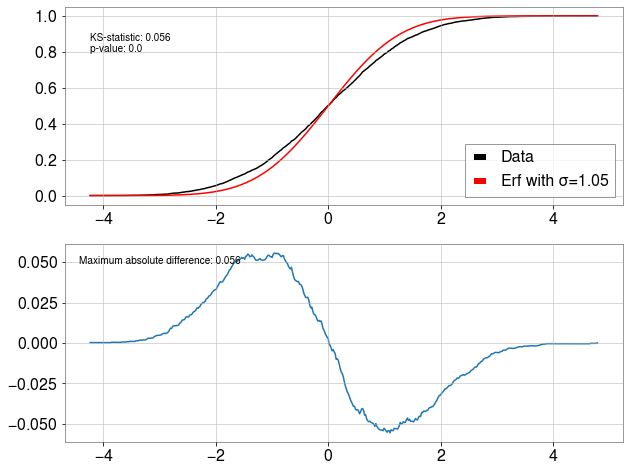

In [31]:
stat_checks_pygwb_MDC.plot_KS_test()

The histogram below shows the distribution of the variances over the mean variance (using sliding sigmas). Most of this distribution should be around 1.

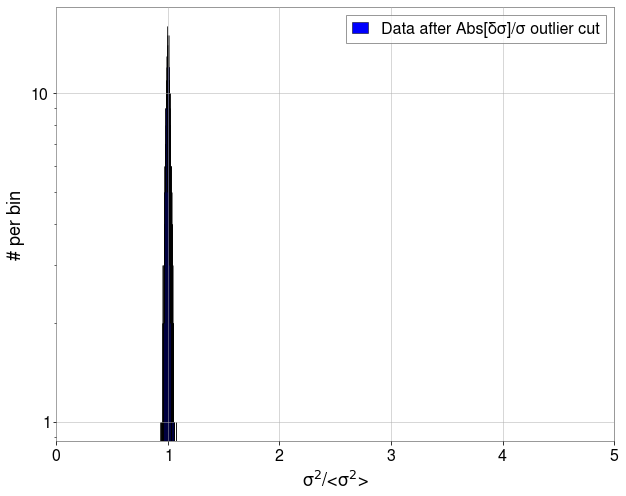

In [32]:
stat_checks_pygwb_MDC.plot_hist_sigma_squared()

A linear fit of the sliding point estimates is performed. Note that the C1 coefficient is essentially 0, whereas the C2 coefficient is exactly the injected value of the signal.

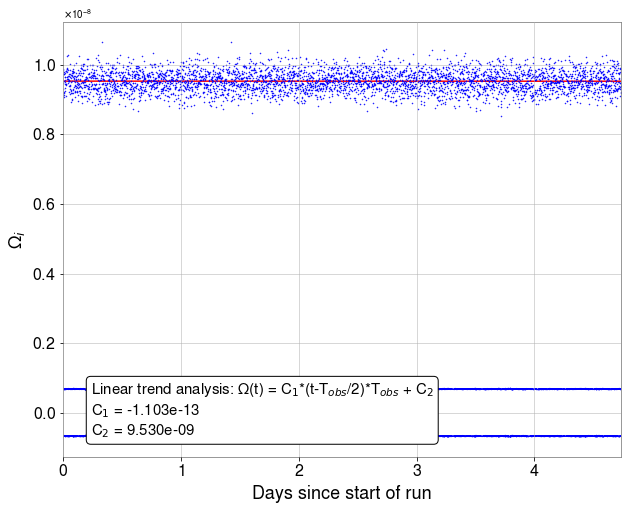

In [33]:
stat_checks_pygwb_MDC.plot_omega_time_fit()

## Example 3: Simulated power-law signal with noise (MDC dataset)

To be added

## To do list

The current status of the statistical checks and this notebook gives an idea of what the scope and functionalities of the module are. However, a few things need to be done before marked as completed:

- Add an extra dataset from the MDC where noise was also present.
- Look into KS test
- Work on a script to optimize the reading in of the output of pygwb_pipe.